# Projeto Airbnb Rio - Ferramenta de Previsão de Preço de Imóvel para pessoas comuns 

## Alunos:
    - João Augusto - ADS;
    - Murilo Emanoel - BCC;

### Contexto

No Airbnb, qualquer pessoa que possua um quarto ou um imóvel de qualquer tipo (apartamento, casa, chalé, pousada, etc.) pode ofertar o seu imóvel para ser alugado por diária.

Você cria o seu perfil de host (pessoa que disponibiliza um imóvel para aluguel por diária) e cria o anúncio do seu imóvel.

Nesse anúncio, o host deve descrever as características do imóvel da forma mais completa possível, de forma a ajudar os locadores/viajantes a escolherem o melhor imóvel para eles (e de forma a tornar o seu anúncio mais atrativo)

Existem dezenas de personalizações possíveis no seu anúncio, desde quantidade mínima de diária, preço, quantidade de quartos, até regras de cancelamento, taxa extra para hóspedes extras, exigência de verificação de identidade do locador, etc.

### Nosso objetivo

Construir um modelo de previsão de preço que permita uma pessoa comum que possui um imóvel possa saber quanto deve cobrar pela diária do seu imóvel.

Ou ainda, para o locador comum, dado o imóvel que ele está buscando, ajudar a saber se aquele imóvel está com preço atrativo (abaixo da média para imóveis com as mesmas características) ou não.

### Base de dados

Baixar as bases de dados do site kaggle: https://www.kaggle.com/allanbruno/airbnb-rio-de-janeiro

- As bases de dados são os preços dos imóveis obtidos e suas respectivas características em cada mês.
- Os preços são dados em reais (R$)
- Temos bases de abril de 2018 a maio de 2020, com exceção de junho de 2018 que não possui base de dados

### Expectativas Iniciais

- A sazonalidade pode ser um fator importante, visto que meses como dezembro costumam ser bem caros no RJ
- A localização do imóvel deve fazer muita diferença no preço, já que no Rio de Janeiro a localização pode mudar completamente as características do lugar (segurança, beleza natural, pontos turísticos)
- Adicionais/Comodidades podem ter um impacto significativo, visto que temos muitos prédios e casas antigos no Rio de Janeiro

Vamos descobrir o quanto esses fatores impactam e se temos outros fatores não tão intuitivos que são extremamente importantes.

### Etapas previstas do Projeto (metodologia CRISP)
- Definição do Problema
- Entendimento e ajuste (limpeza) dos dados
- Análise Exploratória,  analisar os Outliers
- Tratamento dos dados
- Definição do algoritmo de aprendizagem de máquina
- Validação do modelo
- Apresentação dos dados
- Modelo em produção

### Importar Bibliotecas e Bases de Dados

- Iniciaremos fazendo o importe das bibliotecas iniciais necessárias para realizar a carga da base de dados. Se o bloco abaixo der erro no seu computador, pesquise pelo programa "prompt Anaconda" e execute os seguintes códigos de instalação:
    - pip install seaborn
    - pip install plotly

### Etapa de Limpeza e ajuste dos dados:
Importem as bibliotecas: pandas, pathlib, numpy, matplotlib, seaborn, pltly.express, sklearn.metrics, skleanr.linear_model, sklearn.ensemble e sklearn.model_selection

In [1]:
import datetime as dt
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn.metrics
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split

### Importar as bases de dados

- Para cada arquivo da base de dados importado, adicione duas colunas na base de dados uma para o mês e outra para o ano.

- Adicione cada arquivo lido na base_airbnb

- Utilize a biblioteca pathlib.Path para definir o caminho de identificação da base

In [2]:
# for criado para carregar todas as bases da pasta archive, exceto a "total_data"
base_airbnb = pd.DataFrame()
for arquivo_csv in Path('./archive').glob('*.csv'):
    df = pd.read_csv(arquivo_csv, low_memory=False)
    base_airbnb = pd.concat([base_airbnb, df], ignore_index=True)
   
# extraindo data de last_scraped e criando duas colunas novas
base_airbnb["last_scraped"] = pd.to_datetime(base_airbnb["last_scraped"])
base_airbnb["mes"] = base_airbnb["last_scraped"].dt.month
base_airbnb["ano"] = base_airbnb["last_scraped"].dt.year

### Agora vamos começar os tratamentos de dados

- Como temos muitas colunas, nosso modelo pode acabar ficando muito lento.
- Além disso, uma análise rápida permite ver que várias colunas não são necessárias para o nosso modelo de previsão, por isso, vamos excluir algumas colunas da base
- Tipos de colunas que vamos excluir:
    1. IDs, Links e informações não relevantes para o modelo
    2. Colunas repetidas ou extremamente parecidas com outra (que dão a mesma informação para o modelo. Ex: Data x Ano/Mês (mantenham o Ano/Mês que foram adicionados a base
    3. Colunas preenchidas com texto livre -> Não rodaremos nenhuma análise de palavras ou algo do tipo
    4. Colunas em que todos ou quase todos os valores são iguais
- Ao final visualize a base de dados

In [3]:
# excluindo colunas que não se encaixam nos parâmetros acima citados
base_airbnb = base_airbnb.drop(['id', 'name', 'listing_url', 'scrape_id', 'last_scraped', 'summary','space', 'description', 
                                'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 
                                'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 
                                'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
                                'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 
                                'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 
                                'host_total_listings_count', 'host_verifications','host_has_profile_pic', 
                                'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed',
                                'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 
                                'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'amenities', 
                                'square_feet', 'weekly_price', 'monthly_price', 'security_deposit',
                                'cleaning_fee', 'guests_included', 'calendar_updated', 'has_availability', 
                                'availability_30', 'availability_60', 'availability_90', 'availability_365', 
                                'calendar_last_scraped', 'first_review', 'last_review', 'review_scores_rating',
                                'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
                                'review_scores_communication', 'review_scores_location', 'review_scores_value', 
                                'requires_license', 'license', 'jurisdiction_names', 'instant_bookable',
                                'is_business_travel_ready', 'cancellation_policy', 'require_guest_profile_picture', 
                                'require_guest_phone_verification', 'calculated_host_listings_count', 'reviews_per_month'
                               ], axis=1)

In [4]:
base_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902210 entries, 0 to 902209
Data columns (total 25 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   host_listings_count                           901750 non-null  float64
 1   property_type                                 902210 non-null  object 
 2   room_type                                     902210 non-null  object 
 3   accommodates                                  902210 non-null  int64  
 4   bathrooms                                     900486 non-null  float64
 5   bedrooms                                      901360 non-null  float64
 6   beds                                          899708 non-null  float64
 7   bed_type                                      902210 non-null  object 
 8   price                                         902210 non-null  object 
 9   extra_people                                  90

### Tratar Valores Faltando

- Visualizando os dados, percebemos que existe uma grande disparidade em dados faltantes. As colunas com mais de 300.000 valores NaN devem ser excluídas
- Para as outras colunas, como temos muitos dados (mais de 900.000 linhas) vamos excluir as linhas que contém dados NaN

In [5]:
contagem_nan = base_airbnb.isnull().sum()
colunas_mantidas = contagem_nan[contagem_nan <= 300000].index
base_airbnb = base_airbnb[colunas_mantidas]
base_airbnb = base_airbnb.dropna()

### Verificar Tipos de Dados em cada coluna

- Precisamos fazer isso porque às vezes o Python está lendo como texto alguma coluna que deveria ser um número, então precisamos corrigir

In [6]:
# Verificando o domínio dos dados
base_airbnb.info()
base_airbnb[["price", "extra_people"]].head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 897709 entries, 0 to 902209
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   host_listings_count  897709 non-null  float64
 1   property_type        897709 non-null  object 
 2   room_type            897709 non-null  object 
 3   accommodates         897709 non-null  int64  
 4   bathrooms            897709 non-null  float64
 5   bedrooms             897709 non-null  float64
 6   beds                 897709 non-null  float64
 7   bed_type             897709 non-null  object 
 8   price                897709 non-null  object 
 9   extra_people         897709 non-null  object 
 10  minimum_nights       897709 non-null  int64  
 11  maximum_nights       897709 non-null  int64  
 12  number_of_reviews    897709 non-null  int64  
 13  mes                  897709 non-null  int32  
 14  ano                  897709 non-null  int32  
dtypes: float64(4), int32(2

,price,extra_people
0,$133.00,$34.00
1,$270.00,$51.00
2,$222.00,$215.00
3,$161.00,$45.00
4,$222.00,$68.00
5,$308.00,$86.00
6,$219.00,$80.00
7,$150.00,$150.00
8,$120.00,$0.00
9,"$3,241.00",$126.00


- Como preço e extra people estão sendo reconhecidos como objeto (ao invés de ser um float) temos que mudar o tipo de variável da coluna.

In [7]:
#Antes de realizar a conversão para numérico é necessário remover o cifrão e a vírgula de ambas as colunas
base_airbnb["price"] = base_airbnb["price"].str.replace('$','')
base_airbnb["price"] = base_airbnb["price"].str.replace(',','')
base_airbnb["extra_people"] = base_airbnb["extra_people"].str.replace('$','')
base_airbnb["extra_people"] = base_airbnb["extra_people"].str.replace(',','')
#Após isso podemos converter para float
base_airbnb["price"] = pd.to_numeric(base_airbnb["price"], errors="coerce")
base_airbnb["extra_people"] = pd.to_numeric(base_airbnb["extra_people"], errors="coerce")

base_airbnb.info()
base_airbnb[["price", "extra_people"]].head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 897709 entries, 0 to 902209
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   host_listings_count  897709 non-null  float64
 1   property_type        897709 non-null  object 
 2   room_type            897709 non-null  object 
 3   accommodates         897709 non-null  int64  
 4   bathrooms            897709 non-null  float64
 5   bedrooms             897709 non-null  float64
 6   beds                 897709 non-null  float64
 7   bed_type             897709 non-null  object 
 8   price                897709 non-null  float64
 9   extra_people         897709 non-null  float64
 10  minimum_nights       897709 non-null  int64  
 11  maximum_nights       897709 non-null  int64  
 12  number_of_reviews    897709 non-null  int64  
 13  mes                  897709 non-null  int32  
 14  ano                  897709 non-null  int32  
dtypes: float64(6), int32(2

,price,extra_people
0,133.0,34.0
1,270.0,51.0
2,222.0,215.0
3,161.0,45.0
4,222.0,68.0
5,308.0,86.0
6,219.0,80.0
7,150.0,150.0
8,120.0,0.0
9,3241.0,126.0


### Análise Exploratória e Tratar Outliers

- Vamos basicamente olhar feature por feature para:
    1. Ver a correlação entre as features e decidir se manteremos todas as features que temos.
    2. Excluir outliers (usaremos como regra, valores abaixo de Q1 - 1.5x Amplitude e valores acima de Q3 + 1.5x Amplitude). Amplitude = Q3 - Q1
    3. Confirmar se todas as features que temos fazem realmente sentido para o nosso modelo ou se alguma delas não vai nos ajudar e se devemos excluir
    
- Vamos começar pelas colunas de preço (resultado final que queremos) e de extra_people (também valor monetário). Esses são os valores numéricos contínuos.

- Depois vamos analisar as colunas de valores numéricos discretos (accomodates, bedrooms, guests_included, etc.)

- Por fim, vamos avaliar as colunas de texto e definir quais categorias fazem sentido mantermos ou não.

MAS CUIDADO: não saia excluindo direto outliers, pense exatamente no que você está fazendo. Se não tem um motivo claro para remover o outlier, talvez não seja necessário e pode ser prejudicial para a generalização. Então tem que ter uma balança ai. Claro que você sempre pode testar e ver qual dá o melhor resultado, mas fazer isso para todas as features vai dar muito trabalho.

Ex de análise: Se o objetivo é ajudar a precificar um imóvel que você está querendo disponibilizar, excluir outliers em host_listings_count pode fazer sentido. Agora, se você é uma empresa com uma série de propriedades e quer comparar com outras empresas do tipo também e se posicionar dessa forma, talvez excluir quem tem acima de 6 propriedades tire isso do seu modelo. Pense sempre no seu objetivo

### Definição de Funções para Análise de Outliers

Vamos definir algumas funções para ajudar na análise de outliers das colunas

In [8]:
def detectar_outliers_iqr(data, coluna):
    Q1 = np.percentile(data[coluna], 25)
    Q3 = np.percentile(data[coluna], 75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    outliers = data[(data[coluna] < limite_inferior) | (data[coluna] > limite_superior)]
    
    return outliers

def deletar_outliers_iqr(data, coluna):
    Q1 = np.percentile(data[coluna], 25)
    Q3 = np.percentile(data[coluna], 75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    data_sem_outliers = data[(data[coluna] >= limite_inferior) & (data[coluna] <= limite_superior)]
    
    return data_sem_outliers

### price

Como estamos construindo um modelo para imóveis comuns, acredito que os valores acima do limite superior serão apenas de apartamentos de altíssimo luxo, que não é o nosso objetivo principal. Por isso, podemos excluir esses outliers.

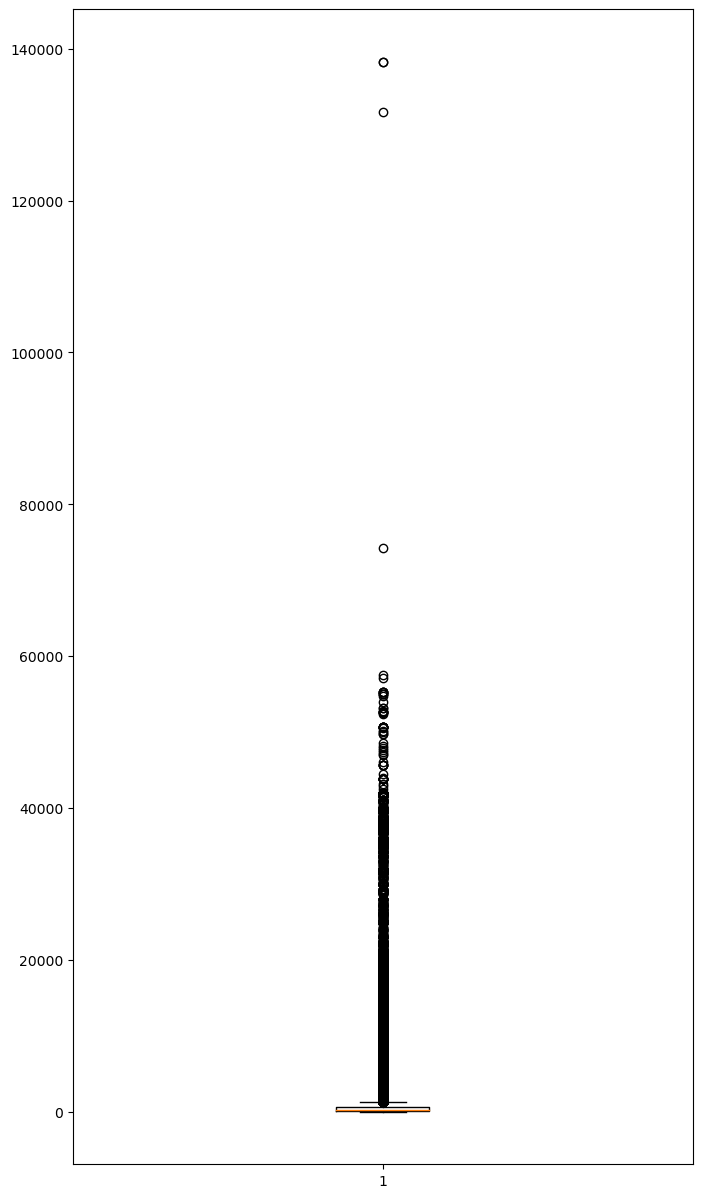

In [9]:
# Gerando o boxplot para a coluna price
fig, ax = plt.subplots(figsize=(8,15))

ax.boxplot(base_airbnb.price)

plt.show()

In [10]:
base_airbnb = deletar_outliers_iqr(base_airbnb, 'price')
base_airbnb.describe()

,host_listings_count,accommodates,bathrooms,bedrooms,beds,price,extra_people,minimum_nights,maximum_nights,number_of_reviews,mes,ano
count,810427.000000,810427.000000,810427.000000,810427.000000,810427.000000,810427.000000,810427.000000,810427.000000,8.104270e+05,810427.000000,810427.000000,810427.000000
mean,7.648029,3.918485,1.547822,1.504628,2.422852,353.888912,38.393243,4.291064,4.622052e+04,8.454928,6.329324,2018.859415
std,32.670857,2.199885,1.026400,0.928901,1.869297,284.113098,84.558320,20.065039,7.705797e+06,22.763913,3.397878,0.715011
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,0.000000,1.000000,2018.000000
25%,1.000000,2.000000,1.000000,1.000000,1.000000,149.000000,0.000000,1.000000,3.000000e+01,0.000000,4.000000,2018.000000
50%,1.000000,4.000000,1.000000,1.000000,2.000000,251.000000,0.000000,2.000000,1.125000e+03,1.000000,6.000000,2019.000000
75%,3.000000,5.000000,2.000000,2.000000,3.000000,491.000000,50.000000,4.000000,1.125000e+03,5.000000,9.000000,2019.000000
max,1321.000000,16.000000,200.000000,45.000000,86.000000,1276.000000,5631.000000,1224.000000,2.147484e+09,401.000000,12.000000,2020.000000


### extra_people

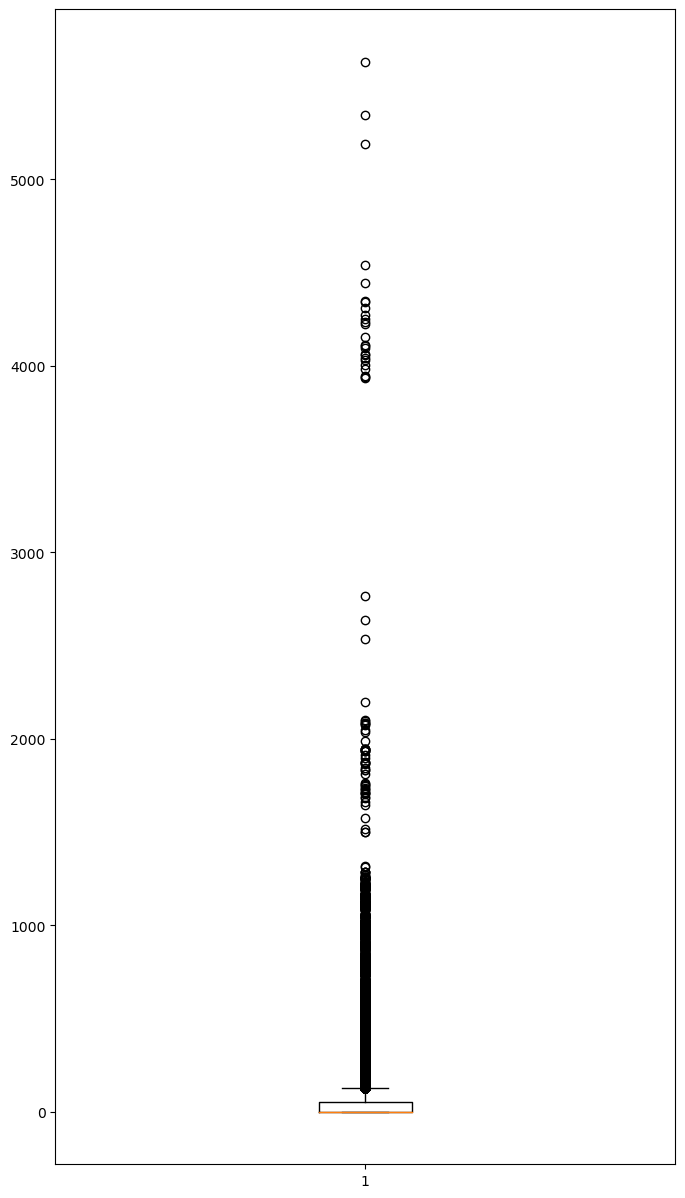

In [11]:
fig, ax = plt.subplots(figsize=(8,15))

ax.boxplot(base_airbnb['extra_people'])

plt.show()

In [12]:
base_airbnb = deletar_outliers_iqr(base_airbnb, 'extra_people')
base_airbnb.describe()

,host_listings_count,accommodates,bathrooms,bedrooms,beds,price,extra_people,minimum_nights,maximum_nights,number_of_reviews,mes,ano
count,751233.000000,751233.000000,751233.000000,751233.000000,751233.000000,751233.000000,751233.000000,751233.000000,7.512330e+05,751233.000000,751233.000000,751233.000000
mean,8.012903,3.866579,1.525804,1.481824,2.382996,343.776903,21.729952,4.210755,4.981189e+04,8.648161,6.331902,2018.857907
std,33.823633,2.172659,1.026990,0.917724,1.835388,279.957769,33.461038,18.738310,8.003623e+06,23.075821,3.396254,0.714537
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,0.000000,1.000000,2018.000000
25%,1.000000,2.000000,1.000000,1.000000,1.000000,147.000000,0.000000,1.000000,3.000000e+01,0.000000,4.000000,2018.000000
50%,1.000000,4.000000,1.000000,1.000000,2.000000,249.000000,0.000000,2.000000,1.125000e+03,1.000000,6.000000,2019.000000
75%,3.000000,5.000000,2.000000,2.000000,3.000000,452.000000,45.000000,4.000000,1.125000e+03,5.000000,9.000000,2019.000000
max,1321.000000,16.000000,200.000000,45.000000,86.000000,1276.000000,125.000000,1224.000000,2.147484e+09,401.000000,12.000000,2020.000000


### host_listings_count

Podemos excluir os outliers, porque para o objetivo do nosso projeto porque hosts com mais de 6 imóveis no airbnb não é o público alvo do objetivo do projeto (imagino que sejam imobiliários ou profissionais que gerenciam imóveis no airbnb)

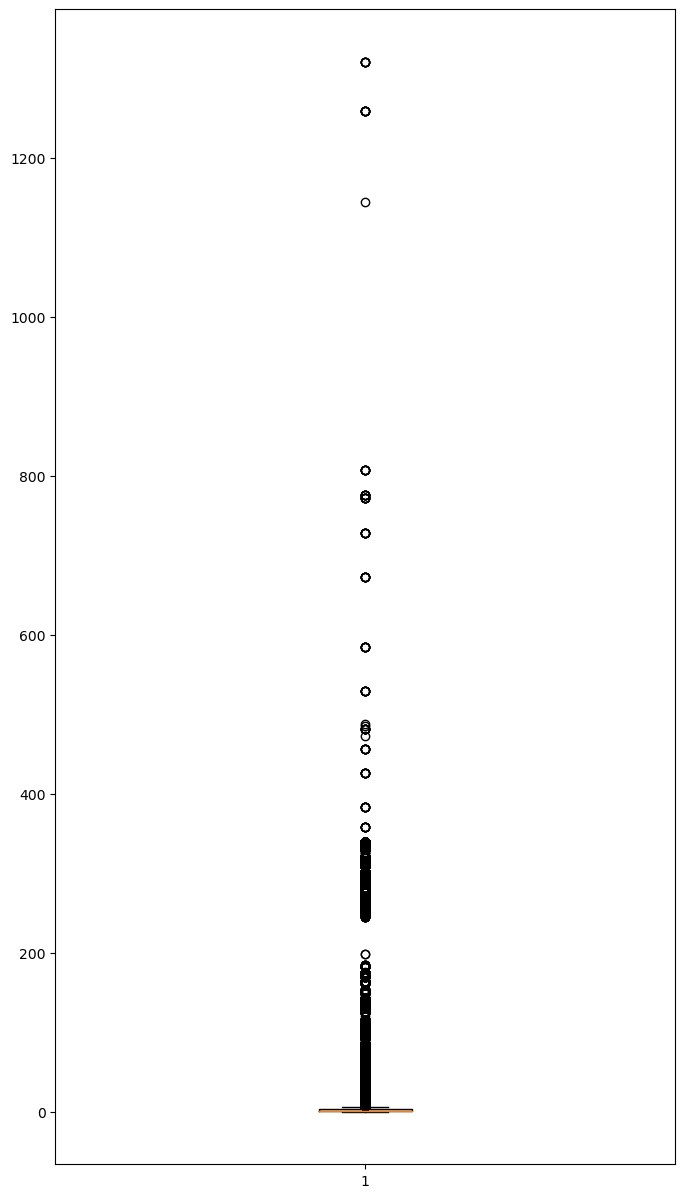

In [13]:
# Gerando o boxplot para a coluna price
fig, ax = plt.subplots(figsize=(8,15))

ax.boxplot(base_airbnb['host_listings_count'])

plt.show()

In [14]:
base_airbnb = deletar_outliers_iqr(base_airbnb, 'host_listings_count')
base_airbnb.describe()

,host_listings_count,accommodates,bathrooms,bedrooms,beds,price,extra_people,minimum_nights,maximum_nights,number_of_reviews,mes,ano
count,653510.000000,653510.000000,653510.000000,653510.000000,653510.000000,653510.000000,653510.000000,653510.000000,6.535100e+05,653510.000000,653510.000000,653510.000000
mean,1.699659,3.746402,1.514502,1.465991,2.321359,343.177864,21.745178,4.331810,2.995924e+04,8.482693,6.343800,2018.854519
std,1.213740,2.079308,0.778908,0.893286,1.751003,282.215042,33.770865,19.743901,5.750598e+06,22.919589,3.396997,0.715235
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,0.000000,1.000000,2018.000000
25%,1.000000,2.000000,1.000000,1.000000,1.000000,142.000000,0.000000,1.000000,3.000000e+01,0.000000,4.000000,2018.000000
50%,1.000000,4.000000,1.000000,1.000000,2.000000,249.000000,0.000000,2.000000,1.125000e+03,1.000000,6.000000,2019.000000
75%,2.000000,5.000000,2.000000,2.000000,3.000000,452.000000,48.000000,4.000000,1.125000e+03,5.000000,9.000000,2019.000000
max,6.000000,16.000000,30.000000,45.000000,86.000000,1276.000000,125.000000,1224.000000,2.147484e+09,401.000000,12.000000,2020.000000


### accommodates

- Pelo mesmo motivo do "host_listings_count" vamos excluir os outliers dessa coluna porque apartamentos que acomodam mais de 9 pessoas não são o nosso foco, nosso objetivo aqui é para imóveis comuns.

- Caso a gente quisesse incluir apartamentos de alto padrão a gente poderia manter essa variável ou então construir um modelo só focado em imóvei com mais de 9 hóspedes

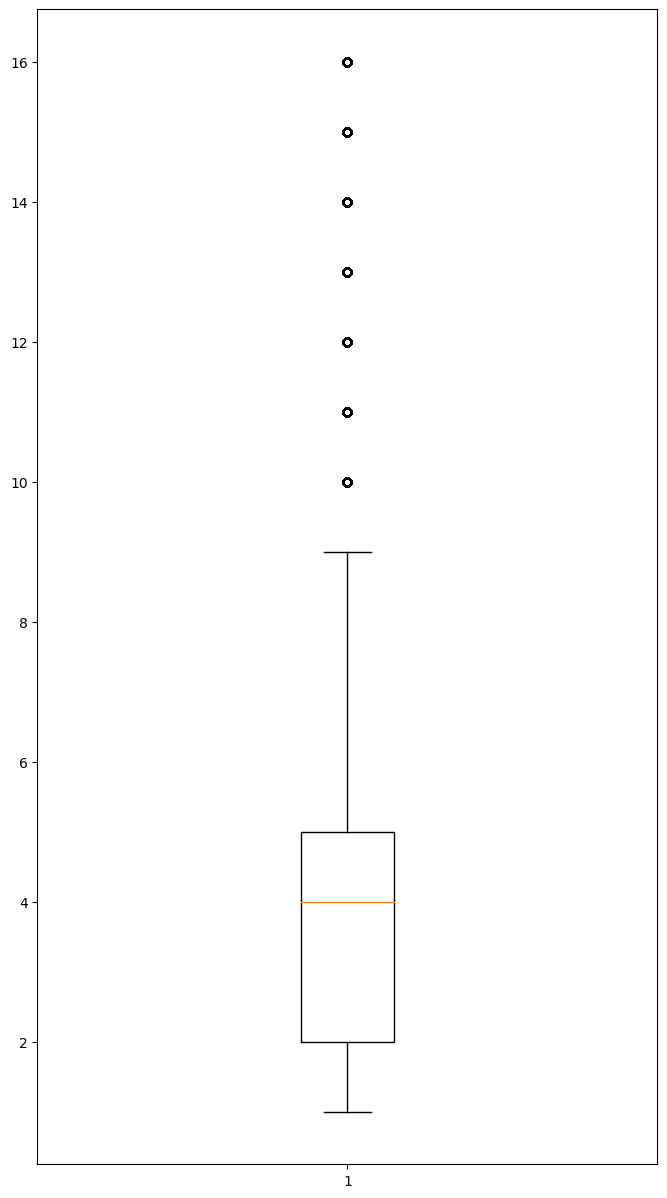

In [15]:
fig, ax = plt.subplots(figsize=(8,15))

ax.boxplot(base_airbnb.accommodates)

plt.show()

In [16]:
base_airbnb = deletar_outliers_iqr(base_airbnb, 'accommodates')
base_airbnb.describe()

,host_listings_count,accommodates,bathrooms,bedrooms,beds,price,extra_people,minimum_nights,maximum_nights,number_of_reviews,mes,ano
count,640364.000000,640364.000000,640364.000000,640364.000000,640364.000000,640364.000000,640364.000000,640364.000000,6.403640e+05,640364.000000,640364.000000,640364.000000
mean,1.692661,3.583362,1.479690,1.429087,2.215757,338.713115,21.528798,4.314596,3.056013e+04,8.490279,6.344384,2018.854395
std,1.206353,1.728271,0.711147,0.816464,1.426947,278.802458,33.629316,19.736128,5.809323e+06,22.994029,3.396991,0.715166
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,0.000000,1.000000,2018.000000
25%,1.000000,2.000000,1.000000,1.000000,1.000000,140.000000,0.000000,1.000000,3.000000e+01,0.000000,4.000000,2018.000000
50%,1.000000,4.000000,1.000000,1.000000,2.000000,247.000000,0.000000,2.000000,1.125000e+03,1.000000,6.000000,2019.000000
75%,2.000000,4.000000,2.000000,2.000000,3.000000,450.000000,45.000000,4.000000,1.125000e+03,5.000000,9.000000,2019.000000
max,6.000000,9.000000,22.000000,22.000000,86.000000,1276.000000,125.000000,1224.000000,2.147484e+09,401.000000,12.000000,2020.000000


### bathrooms 

- Pelo mesmo motivo dos anteriores, vamos excluir os outliers nos banheiros

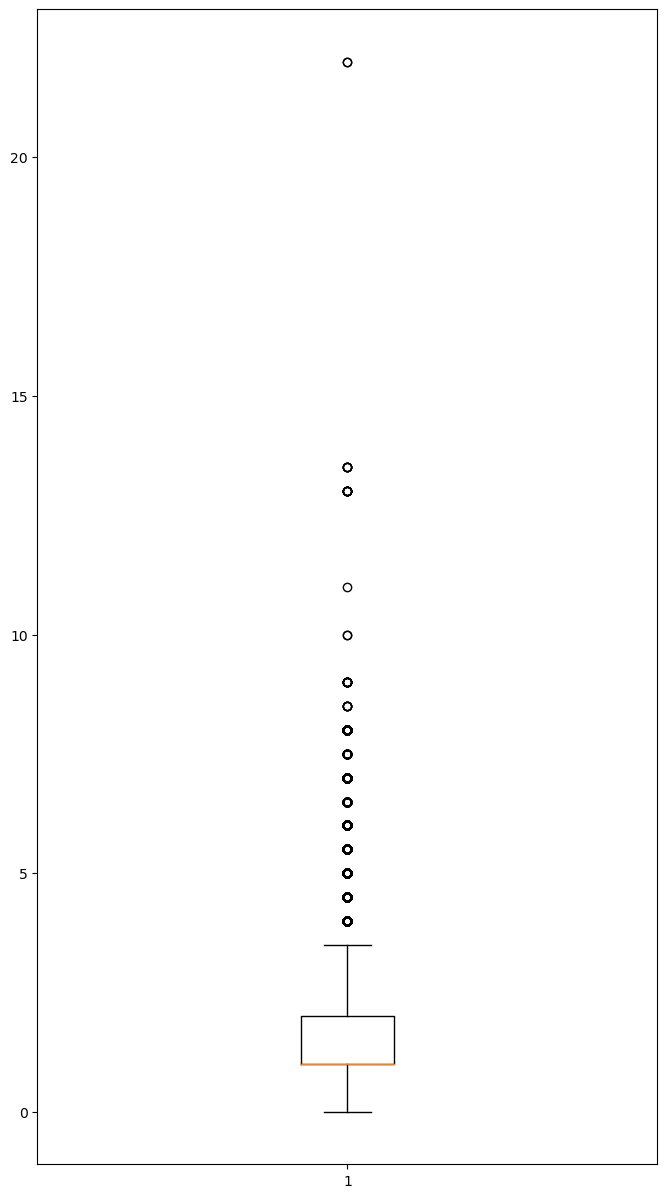

In [17]:
fig, ax = plt.subplots(figsize=(8,15))

ax.boxplot(base_airbnb.bathrooms)

plt.show()

In [18]:
base_airbnb = deletar_outliers_iqr(base_airbnb, 'bathrooms')
base_airbnb.describe()

,host_listings_count,accommodates,bathrooms,bedrooms,beds,price,extra_people,minimum_nights,maximum_nights,number_of_reviews,mes,ano
count,633470.000000,633470.000000,633470.000000,633470.000000,633470.000000,633470.000000,633470.000000,633470.000000,6.334700e+05,633470.000000,633470.000000,633470.000000
mean,1.691021,3.557850,1.445963,1.412526,2.191382,335.980792,21.544956,4.254771,3.088538e+04,8.540951,6.343307,2018.854912
std,1.204320,1.704422,0.626311,0.790204,1.372023,276.347537,33.601713,18.894458,5.840848e+06,23.082197,3.397058,0.715248
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,0.000000,1.000000,2018.000000
25%,1.000000,2.000000,1.000000,1.000000,1.000000,140.000000,0.000000,1.000000,3.000000e+01,0.000000,4.000000,2018.000000
50%,1.000000,4.000000,1.000000,1.000000,2.000000,244.000000,0.000000,2.000000,1.125000e+03,1.000000,6.000000,2019.000000
75%,2.000000,4.000000,2.000000,2.000000,3.000000,449.000000,45.000000,4.000000,1.125000e+03,5.000000,9.000000,2019.000000
max,6.000000,9.000000,3.500000,13.000000,50.000000,1276.000000,125.000000,1224.000000,2.147484e+09,401.000000,12.000000,2020.000000


### bedrooms

- Pelo mesmo motivo dos anteriores, vamos excluir outliers em quantidade de quartos

- Pelo mesmo motivo dos anteriores, vamos excluir outliers em quantidade de camas

Vamos remover essa feature da análise. Parece que os usuários do airbnb usam muito o valor padrão do airbnb como 1 guest included. Isso pode levar o nosso modelo a considerar uma feature que na verdade não é essencial para a definição do preço, por isso, me parece melhor excluir a coluna da análise

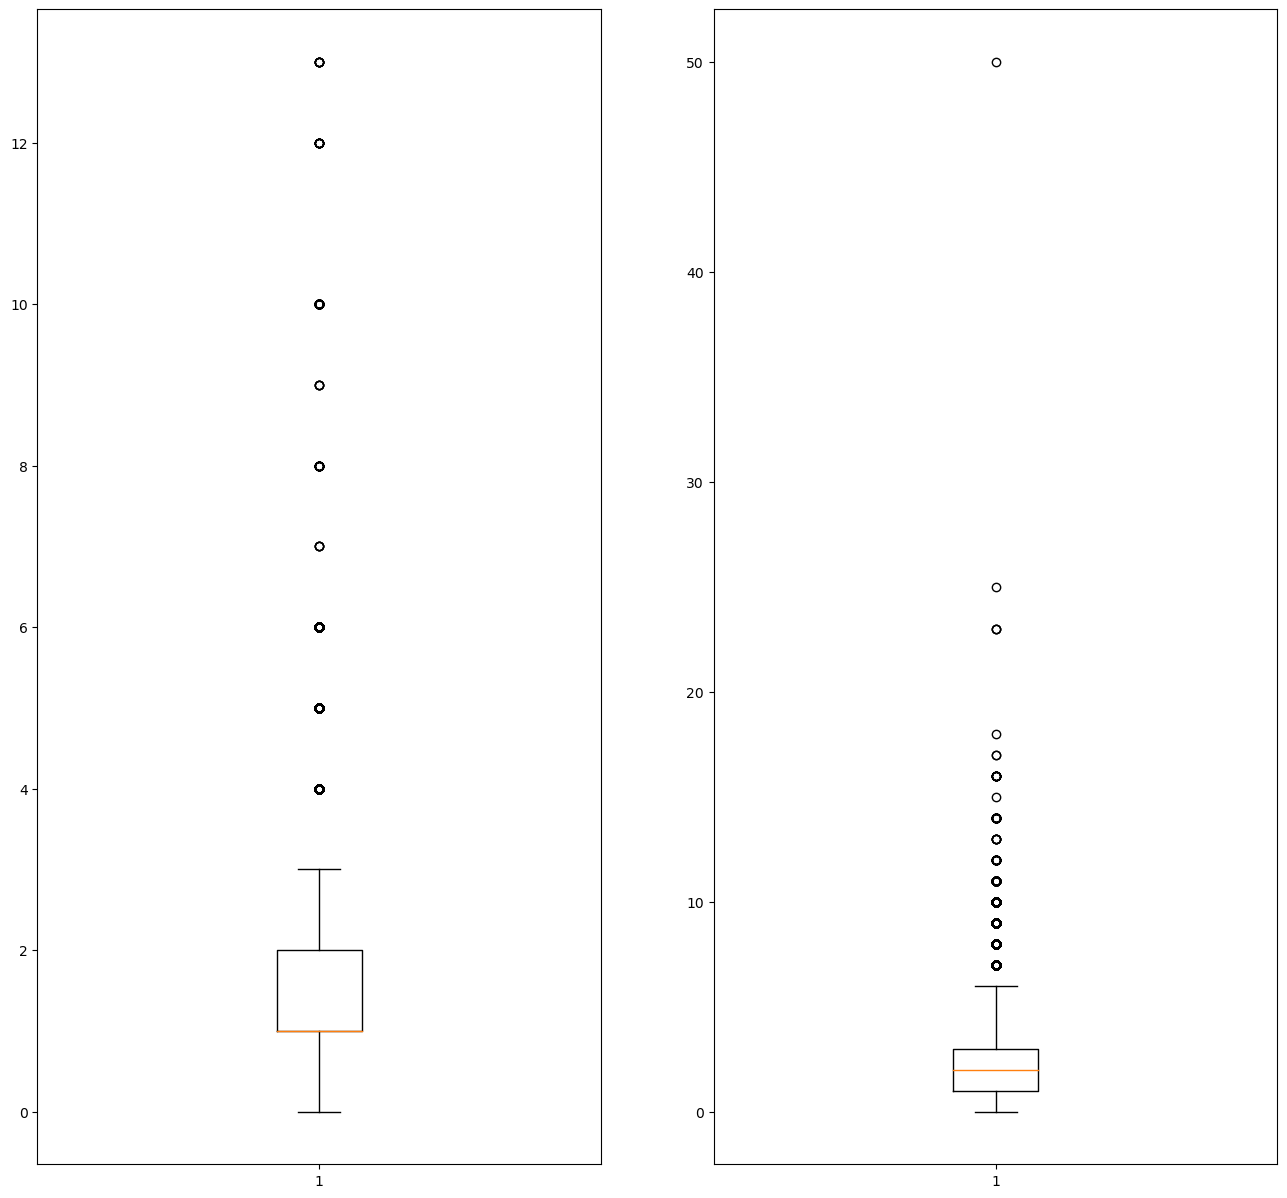

In [19]:
fig, ax = plt.subplots(figsize=(16,15), nrows=1, ncols=2)

ax[0].boxplot(base_airbnb.bedrooms)
ax[1].boxplot(base_airbnb.beds)

plt.show()

In [20]:
base_airbnb = deletar_outliers_iqr(base_airbnb, 'bedrooms')
base_airbnb = deletar_outliers_iqr(base_airbnb, 'beds')
base_airbnb.describe()

,host_listings_count,accommodates,bathrooms,bedrooms,beds,price,extra_people,minimum_nights,maximum_nights,number_of_reviews,mes,ano
count,622366.000000,622366.000000,622366.000000,622366.000000,622366.000000,622366.000000,622366.000000,622366.000000,6.223660e+05,622366.000000,622366.000000,622366.000000
mean,1.686829,3.496690,1.429951,1.379695,2.116756,332.324542,21.420926,4.220158,3.142499e+04,8.549710,6.344289,2018.854886
std,1.200581,1.639701,0.611592,0.737582,1.230153,273.549348,33.493060,18.742736,5.892721e+06,23.102402,3.396869,0.715236
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,0.000000,1.000000,2018.000000
25%,1.000000,2.000000,1.000000,1.000000,1.000000,139.000000,0.000000,1.000000,3.000000e+01,0.000000,4.000000,2018.000000
50%,1.000000,4.000000,1.000000,1.000000,2.000000,239.000000,0.000000,2.000000,1.125000e+03,1.000000,6.000000,2019.000000
75%,2.000000,4.000000,2.000000,2.000000,3.000000,440.000000,45.000000,4.000000,1.125000e+03,5.000000,9.000000,2019.000000
max,6.000000,9.000000,3.500000,3.000000,6.000000,1276.000000,125.000000,1224.000000,2.147484e+09,392.000000,12.000000,2020.000000


### minimum_nights

- Aqui temos um motivo talvez até mais forte para excluir esses apartamentos da análise.

- Estamos querendo um modelo que ajude a precificar apartamentos comuns como uma pessoa comum gostaria de disponibilizar. No caso, apartamentos com mais de 8 noites como o "mínimo de noites" podem ser apartamentos de temporada ou ainda apartamentos para morar, em que o host exige pelo menos 1 mês no apartamento.

- Por isso, vamos excluir os outliers dessa coluna

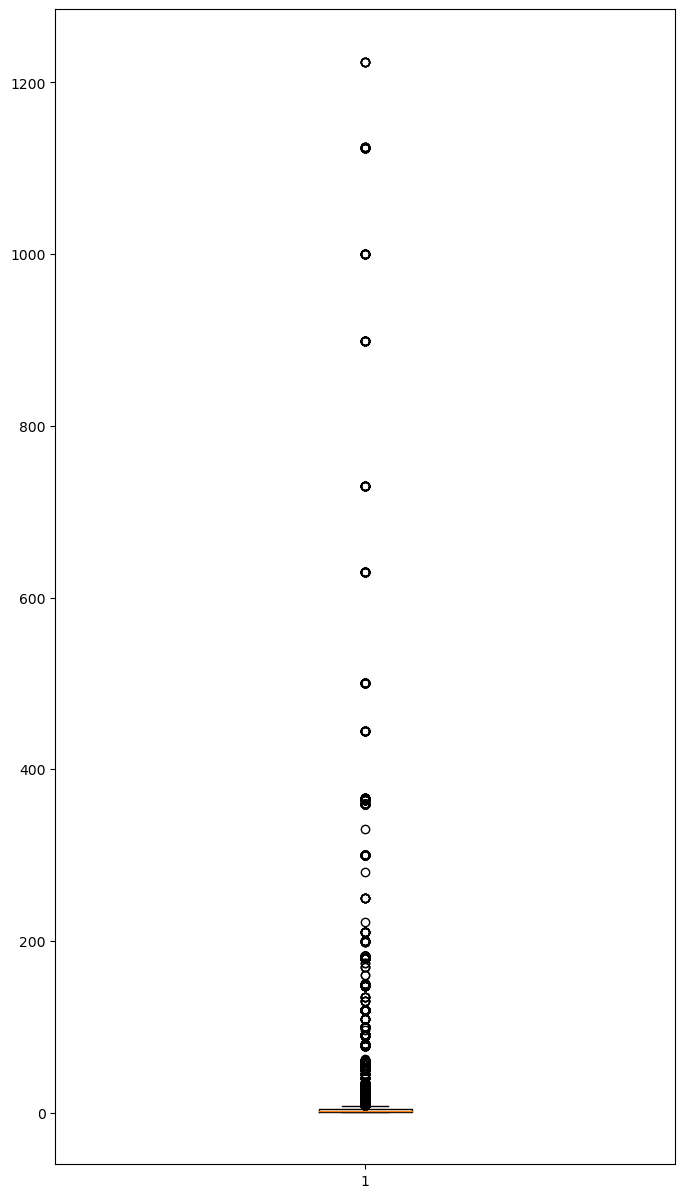

In [21]:
fig, ax = plt.subplots(figsize=(8,15))

ax.boxplot(base_airbnb['minimum_nights'])

plt.show()

In [22]:
base_airbnb = deletar_outliers_iqr(base_airbnb, 'minimum_nights')
base_airbnb.describe()

,host_listings_count,accommodates,bathrooms,bedrooms,beds,price,extra_people,minimum_nights,maximum_nights,number_of_reviews,mes,ano
count,581983.000000,581983.000000,581983.000000,581983.000000,581983.000000,581983.000000,581983.000000,581983.000000,5.819830e+05,581983.000000,581983.000000,581983.000000
mean,1.707436,3.469167,1.415356,1.360181,2.103269,319.628137,22.379037,2.551841,3.357590e+04,9.020882,6.338512,2018.854424
std,1.215081,1.630716,0.603593,0.729824,1.228864,261.998613,33.892841,1.638559,6.093731e+06,23.699781,3.395204,0.715867
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,0.000000,1.000000,2018.000000
25%,1.000000,2.000000,1.000000,1.000000,1.000000,138.000000,0.000000,1.000000,3.000000e+01,0.000000,4.000000,2018.000000
50%,1.000000,3.000000,1.000000,1.000000,2.000000,228.000000,0.000000,2.000000,1.125000e+03,1.000000,6.000000,2019.000000
75%,2.000000,4.000000,2.000000,2.000000,3.000000,401.000000,50.000000,3.000000,1.125000e+03,6.000000,9.000000,2019.000000
max,6.000000,9.000000,3.500000,3.000000,6.000000,1276.000000,125.000000,8.000000,2.147484e+09,392.000000,12.000000,2020.000000


### maximum_nights

- Essa coluna não parece que vai ajudar na análise.

- Isso porque parece que quase todos os hosts não preenchem esse campo de maximum nights, então ele não parece que vai ser um fator relevante.

- É melhor excluirmos essa coluna da análise

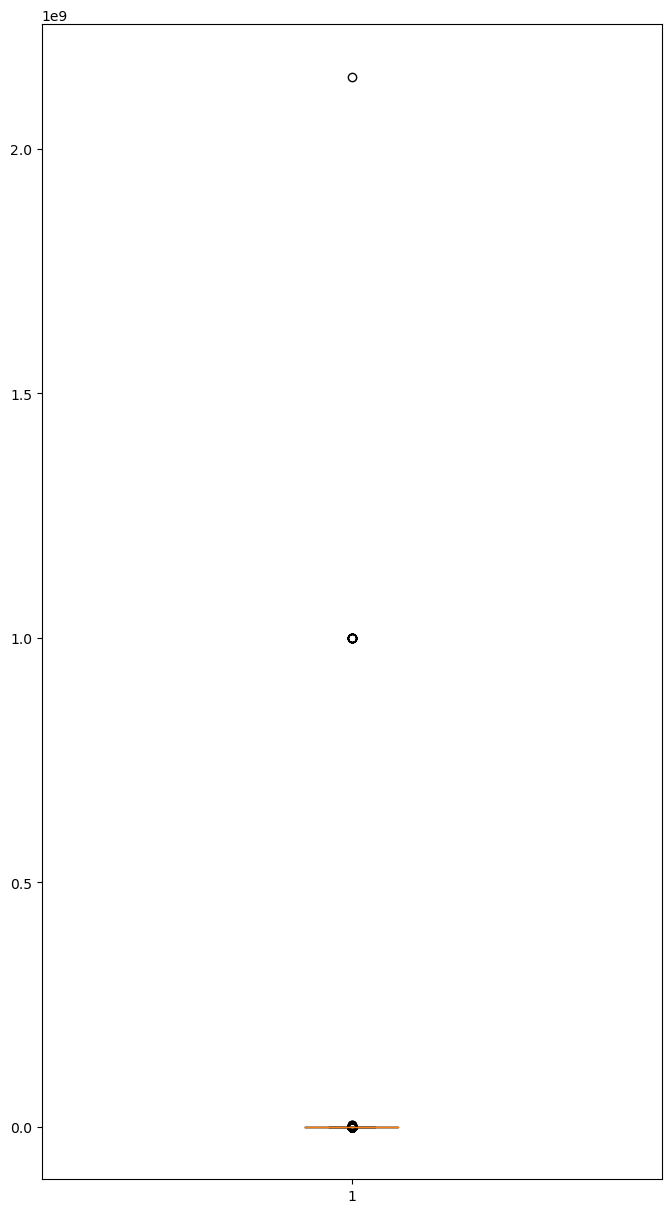

In [23]:
fig, ax = plt.subplots(figsize=(8,15))

ax.boxplot(base_airbnb['maximum_nights'])

plt.show()

In [24]:
base_airbnb = base_airbnb.drop('maximum_nights', axis=1)
base_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 581983 entries, 1 to 902209
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   host_listings_count  581983 non-null  float64
 1   property_type        581983 non-null  object 
 2   room_type            581983 non-null  object 
 3   accommodates         581983 non-null  int64  
 4   bathrooms            581983 non-null  float64
 5   bedrooms             581983 non-null  float64
 6   beds                 581983 non-null  float64
 7   bed_type             581983 non-null  object 
 8   price                581983 non-null  float64
 9   extra_people         581983 non-null  float64
 10  minimum_nights       581983 non-null  int64  
 11  number_of_reviews    581983 non-null  int64  
 12  mes                  581983 non-null  int32  
 13  ano                  581983 non-null  int32  
dtypes: float64(6), int32(2), int64(3), object(3)
memory usage: 62.2+ MB


### number_of_reviews            

- Aqui poderíamos tomar algumas decisões diferentes. Eu vou tomar uma decisão baseado na minha análise pessoal de tirar essa característica da análise, por alguns motivos:

    1. Se excluirmos os outliers, vamos excluir as pessoas que tem a maior quantidade de reviews (o que normalmente são os hosts que têm mais aluguel). Isso pode impactar muito negativamente o nosso modelo
    2. Pensando no nosso objetivo, se eu tenho um imóvel parado e quero colocar meu imóvel lá, é claro que eu não tenho review nenhuma. Então talvez tirar essa característica da análise pode na verdade acabar ajudando.
    3. Particularmente tenho dúvida se essa característica deveria impactar ou não o preço final

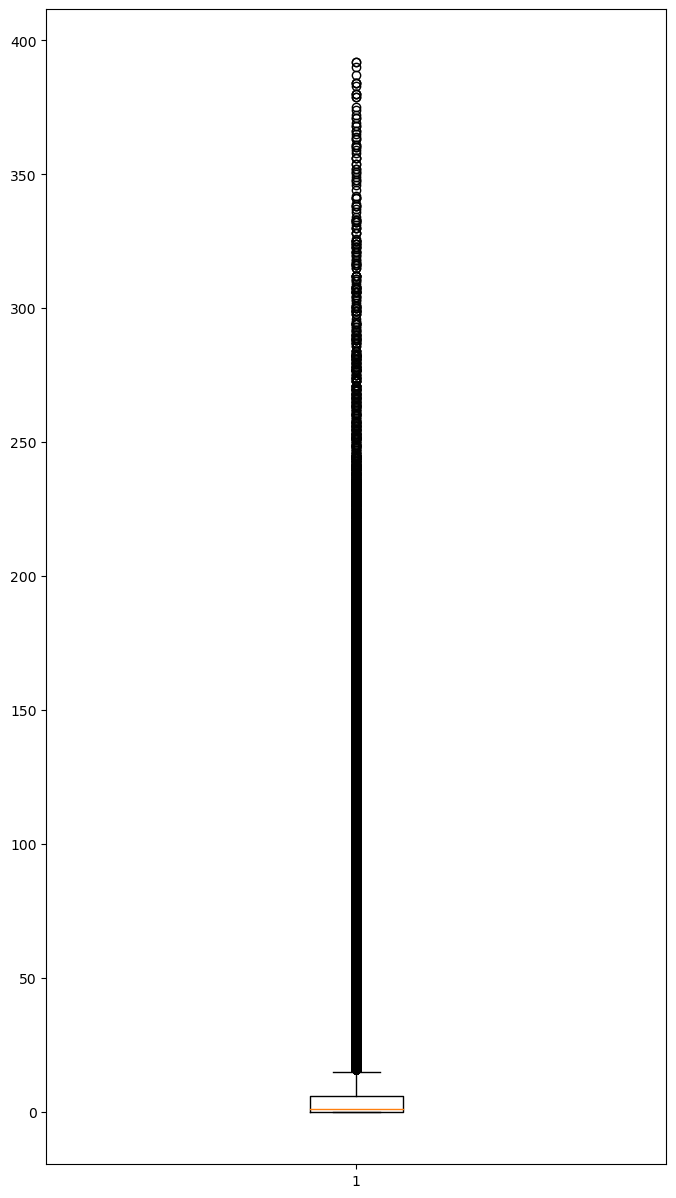

In [25]:
fig, ax = plt.subplots(figsize=(8,15))

ax.boxplot(base_airbnb['number_of_reviews'])

plt.show()

In [26]:
base_airbnb = base_airbnb.drop('number_of_reviews', axis=1)
base_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 581983 entries, 1 to 902209
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   host_listings_count  581983 non-null  float64
 1   property_type        581983 non-null  object 
 2   room_type            581983 non-null  object 
 3   accommodates         581983 non-null  int64  
 4   bathrooms            581983 non-null  float64
 5   bedrooms             581983 non-null  float64
 6   beds                 581983 non-null  float64
 7   bed_type             581983 non-null  object 
 8   price                581983 non-null  float64
 9   extra_people         581983 non-null  float64
 10  minimum_nights       581983 non-null  int64  
 11  mes                  581983 non-null  int32  
 12  ano                  581983 non-null  int32  
dtypes: float64(6), int32(2), int64(2), object(3)
memory usage: 57.7+ MB


### Tratamento de Colunas de Valores de Texto

### - property_type 

In [27]:
base_airbnb['property_type'].unique()

array(['Condominium', 'Apartment', 'Loft', 'Serviced apartment', 'House',
       'Villa', 'Townhouse', 'Bed and breakfast', 'Earth house',
       'Guest suite', 'Guesthouse', 'Other', 'Dorm', 'Hostel', 'Chalet',
       'Treehouse', 'Aparthotel', 'Farm stay', 'Nature lodge',
       'Tiny house', 'Bungalow', 'Cottage', 'Boutique hotel', 'Boat',
       'Hut', 'In-law', 'Cabin', 'Hotel', 'Castle', 'Timeshare',
       'Vacation home', 'Pousada', 'Island', 'Tipi',
       'Casa particular (Cuba)', 'Tent', 'Pension (South Korea)', 'Barn',
       'Resort', 'Yurt', 'Campsite', 'Camper/RV', 'Dome house', 'Plane',
       'Igloo', 'Houseboat', 'Casa particular'], dtype=object)

### - room_type 

In [28]:
base_airbnb['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

### - bed_type 

In [29]:
base_airbnb['bed_type'].unique()
base_airbnb = base_airbnb.drop('bed_type', axis=1)

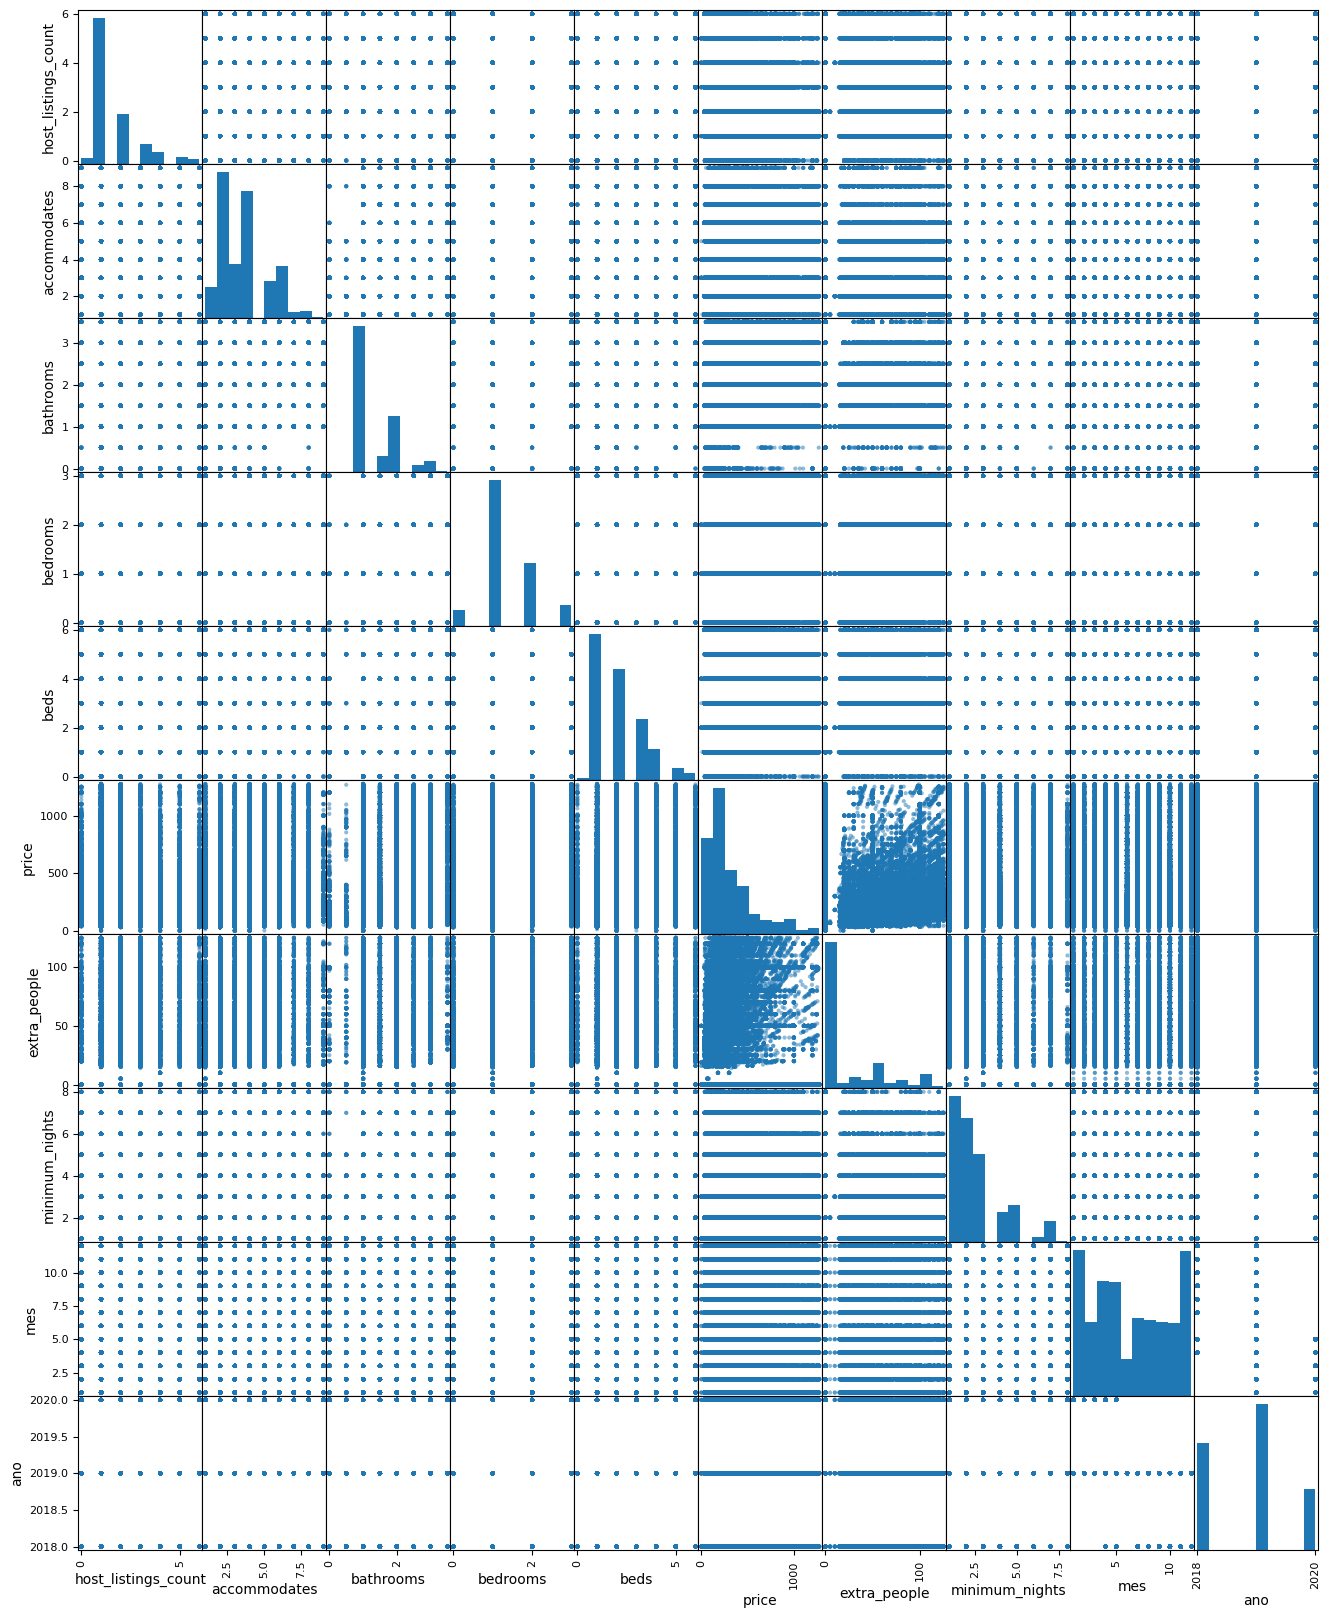

In [30]:
pd.plotting.scatter_matrix(base_airbnb,figsize=(16,20))
plt.show()

In [31]:
# convertendo os campos 'property_type' e 'room_type' em valores numéricos para podermos analisar a correlação deles com a base
categorias, indices = pd.factorize(base_airbnb['property_type'])
mapeamento_categorias = dict(zip(categorias, indices))
base_airbnb['property_type'] = categorias

categorias, indices = pd.factorize(base_airbnb['room_type'])
mapeamento_categorias = dict(zip(categorias, indices))
base_airbnb['room_type'] = categorias

In [32]:
base_airbnb[['host_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 
             'extra_people','minimum_nights', 'property_type', 'room_type', 'mes', 'ano'
            ]].corr()

,host_listings_count,accommodates,bathrooms,bedrooms,beds,price,extra_people,minimum_nights,property_type,room_type,mes,ano
host_listings_count,1.000000,-0.042905,-0.049124,-0.076970,-0.018932,-0.138834,0.081449,-0.022883,0.113798,0.127486,0.001749,-0.017215
accommodates,-0.042905,1.000000,0.457505,0.637258,0.700601,0.392050,0.075253,0.144588,-0.101745,-0.552340,-0.009215,0.006140
bathrooms,-0.049124,0.457505,1.000000,0.599011,0.418100,0.352176,0.017471,0.108612,-0.070525,-0.211107,0.002655,-0.011776
bedrooms,-0.076970,0.637258,0.599011,1.000000,0.574875,0.404843,0.018989,0.129153,-0.096658,-0.321735,0.001239,-0.007016
beds,-0.018932,0.700601,0.418100,0.574875,1.000000,0.283577,0.073886,0.101251,-0.062958,-0.349569,-0.002159,-0.012379
price,-0.138834,0.392050,0.352176,0.404843,0.283577,1.000000,-0.185837,0.187832,-0.081813,-0.311758,-0.002918,0.001931
extra_people,0.081449,0.075253,0.017471,0.018989,0.073886,-0.185837,1.000000,-0.042196,0.000181,-0.000959,-0.001603,0.016387
minimum_nights,-0.022883,0.144588,0.108612,0.129153,0.101251,0.187832,-0.042196,1.000000,-0.085998,-0.233139,-0.007781,0.026748
property_type,0.113798,-0.101745,-0.070525,-0.096658,-0.062958,-0.081813,0.000181,-0.085998,1.000000,0.214460,0.003098,-0.012255
room_type,0.127486,-0.552340,-0.211107,-0.321735,-0.349569,-0.311758,-0.000959,-0.233139,0.214460,1.000000,0.011338,-0.013611


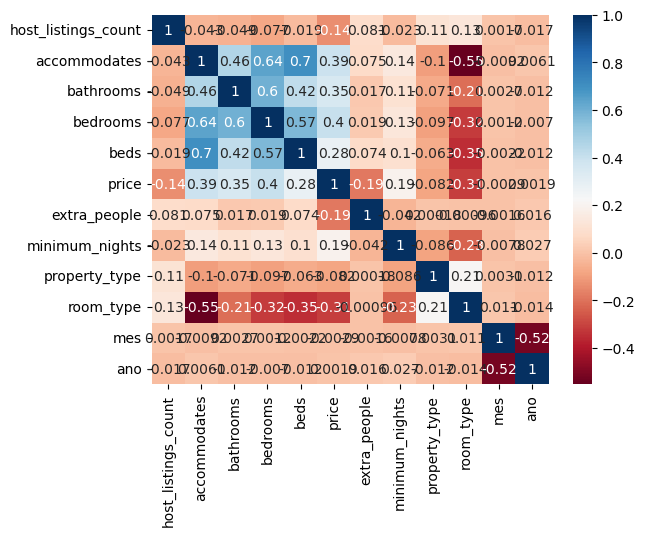

In [33]:
sns.heatmap(base_airbnb[['host_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 
             'extra_people','minimum_nights', 'property_type', 'room_type', 'mes', 'ano'
            ]].corr(),annot=True,cmap='RdBu')
plt.show()

### Modelo de Previsão

- Métricas de Avaliação

Vamos usar aqui o R² que vai nos dizer o quão bem o nosso modelo consegue explicar o preço. Isso seria um ótimo parâmetro para ver o quão bom é nosso modelo <br>
-> Quanto mais próximo de 100%, melhor

Calcular também o Erro Quadrático Médio, que vai mostrar para gente o quanto o nosso modelo está errando. <br>
-> Quanto menor for o erro, melhor

- Escolha dos Modelos a Serem Testados
    1. RandomForest
    2. LinearRegression
    3. Extra Tree
    
Esses são alguns dos modelos que existem para fazer previsão de valores numéricos (o que chamamos de regressão). Estamos querendo calcular o preço, portanto, queremos prever um valor numérico.

Assim, escolhemos esses 3 modelos. Existem dezenas, ou até centenas de modelos diferentes. A medida com que você for aprendendo mais e mais sobre Ciência de Dados, você vai aprender sempre novos modelos e entendendo aos poucos qual o melhor modelo para usar em cada situação.

Mas na dúvida, esses 3 modelos que usamos aqui são bem bons para muitos problemas de Regressão.

- Separa os dados em treino e teste + Treino do Modelo

Essa etapa é crucial. As Inteligências Artificiais aprendendo com o que chamamos de treino.

Basicamente o que a gente faz é: a gente separa as informações em treino e teste, ex: 10% da base de dados vai servir para teste e 90% para treino (normalmente treino é maior mesmo)

Aí, damos para o modelo os dados de treino, ele vai olhar aqueles dados e aprender a prever os preços.

Depois que ele aprende, você faz um teste com ele, com os dados de teste, para ver se ela está bom ou não. Analisando os dados de teste você descobre o melhor modelo

In [34]:
#Separação das bases em treino e teste
X = base_airbnb[['accommodates', 'bathrooms', 'bedrooms', 'beds']]
y = base_airbnb.price
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8 , test_size=0.20, random_state=42)

In [35]:
# RandomForest
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_prev = rf_reg.predict(X_test)
print('R²:')
r2_score(y_test, y_prev)

R²:


0.2526303197746872

In [36]:
print('Erro Quadrático Médio:')
mean_squared_error(y_test, y_prev)

Erro Quadrático Médio:


51427.04905665089

In [37]:
# LinearRegression
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
y_prev = lr_reg.predict(X_test)
print('R²:')
r2_score(y_test, y_prev)

R²:


0.2092052380143079

In [38]:
print('Erro Quadrático Médio:')
mean_squared_error(y_test, y_prev)

Erro Quadrático Médio:


54415.1603877218

In [39]:
# Extra Tree
et_reg = ExtraTreesRegressor()
et_reg.fit(X_train, y_train)
y_prev = et_reg.predict(X_test)
print('R²:')
r2_score(y_test, y_prev)

R²:


0.25268861185163827

In [40]:
print('Erro Quadrático Médio:')
mean_squared_error(y_test, y_prev)

Erro Quadrático Médio:


51423.03793661178

### Análise do Melhor Modelo

- Modelo Escolhido como Melhor Modelo: Extra Tree
   
- Resultados das Métricas de Avaliação no Modelo Vencedor:<br>
R²: 0.25268649915184815<br>
Erro Quadrático Médio: 51423.18331301468


### Ajustes e Melhorias no Melhor Modelo
Constatou-se que, pela natureza das correlações alcançadas em nossa análise exploratória, nenhum dos modelos sugeridos é apto para uma boa solução do problema, em função dos altíssimos valores de erro médio quadrátivo e baixa acurácia. Ainda na análise exploratória, através da scatter matrix e do heatmap, foi possível ver uma mal correlação muito grande entre os diferentes pares possíveis. Ao submeter os pares com maior pontuação de correlação com base na análise do heatmap, os valores de acurácia do modelo indicam que a base não é suciente para aplicação de modelos de regressão.